#### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Importing the dataset

In [3]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Data Description:

ID - Unique ID

Balance - Number of miles eligible for award travel

Qual_mile - Number of miles counted as qualifying for Topflight status

cc1_miles - Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles - Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles - Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles - Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans - Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo - Number of flight miles in the past 12 months

Flight_trans_12 - Number of flight transactions in the past 12 months

Days_since_enrolled - Number of days since enrolled in flier program

Award - whether that person had award flight (free flight) or not

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
#Renaming the Columns
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
#Checking for null values
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


The explaination is as follows: The first line creates an instance of the MinMaxScaler class and assigns it to the variable n. The MinMaxScaler is a common technique used for feature scaling, which scales the features to a specified range, usually between 0 and 1.

The second line of code applies the fit_transform method of the MinMaxScaler to the dataset. It selects all rows (:) and all columns starting from the second column (1:) using iloc. The to_numpy() method converts the selected portion of the DataFrame into a NumPy array. The fit_transform method then scales the selected data.

The third line of code creates a new DataFrame called airline using the scaled data. The data array is used as the data for the new DataFrame, and the column names are set using the column names from the original crime DataFrame, excluding the first column (df.columns[1:]).

In [8]:
airline=df.copy()

Creating a copy of the dataset

#### Analyzing the Dataset 

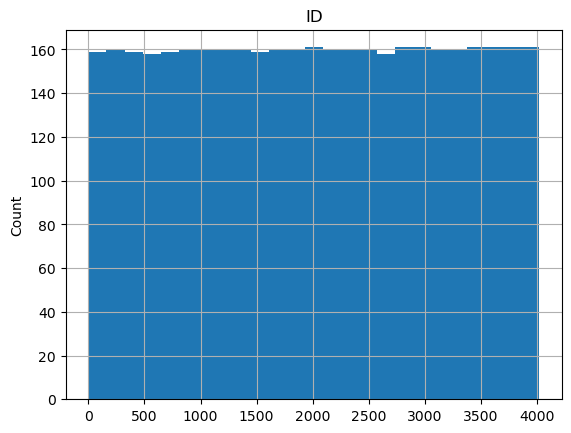

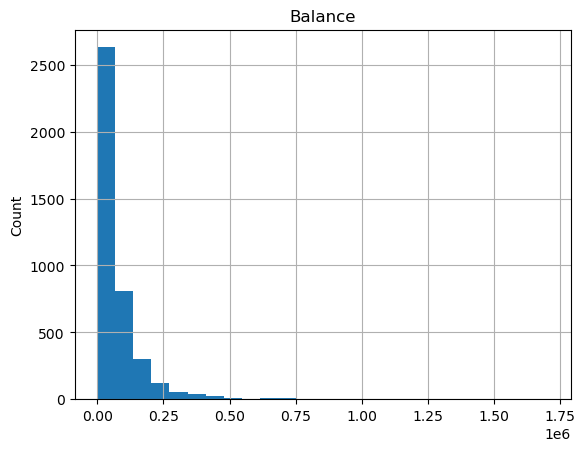

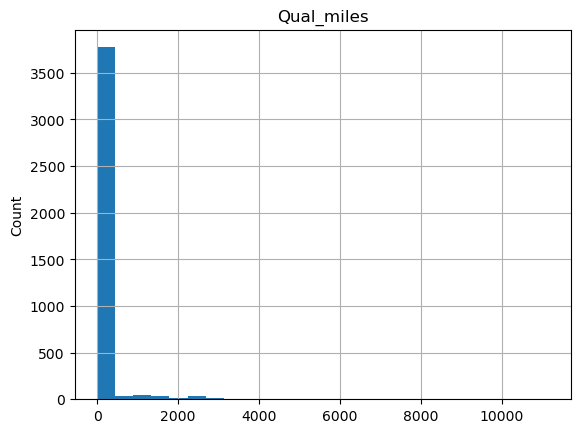

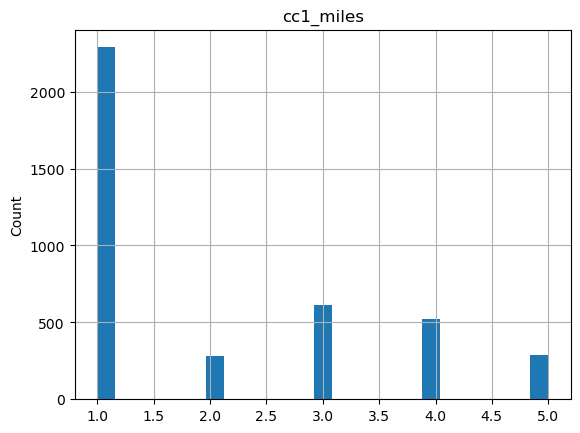

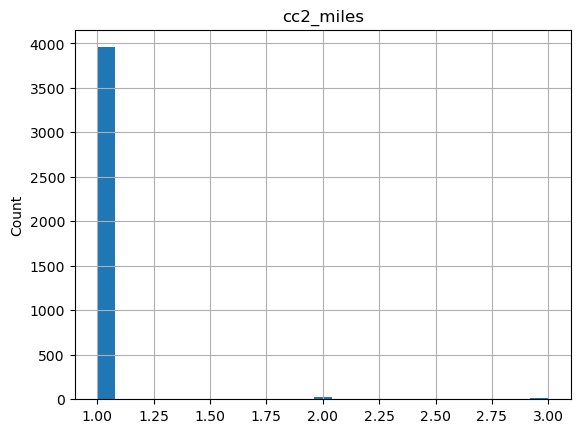

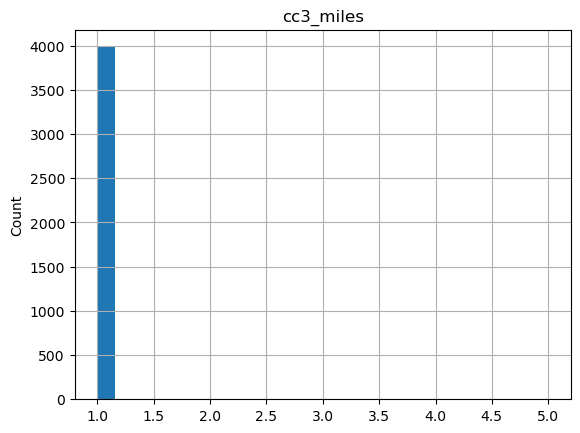

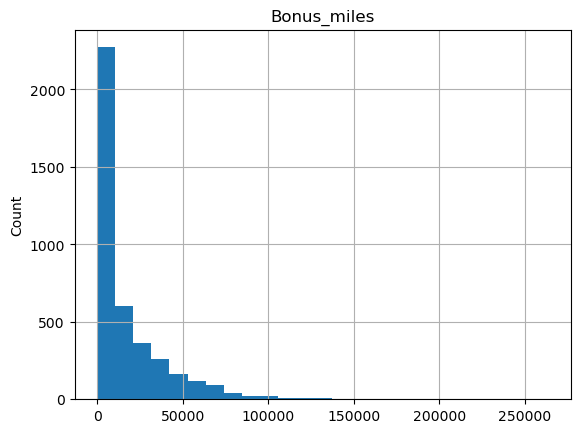

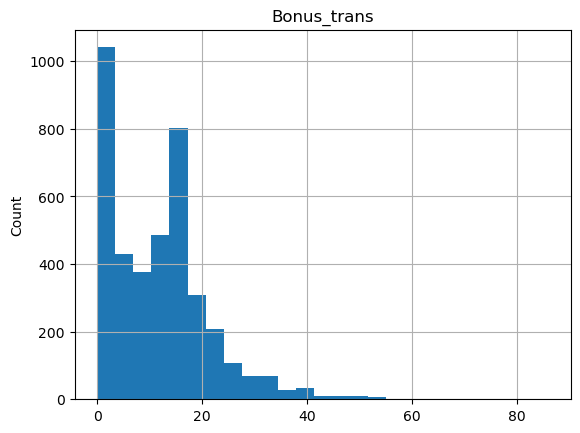

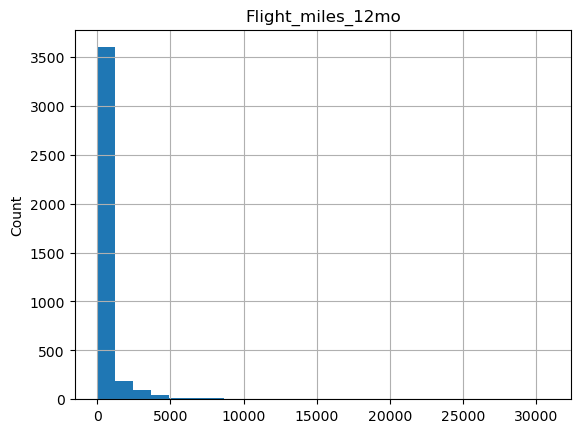

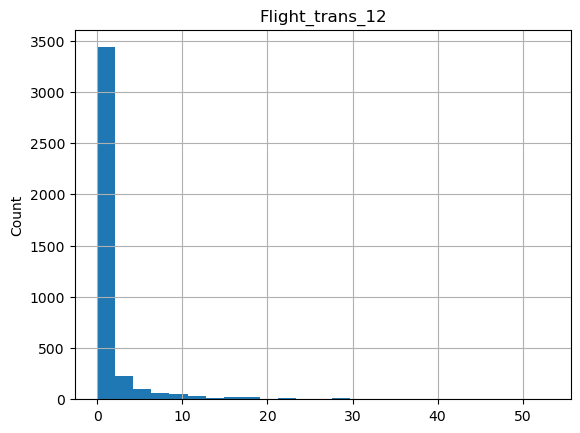

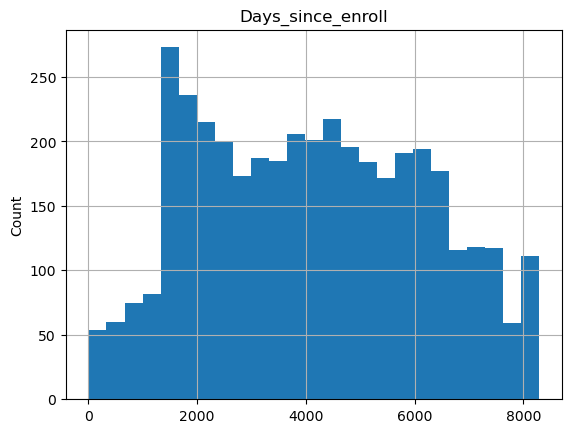

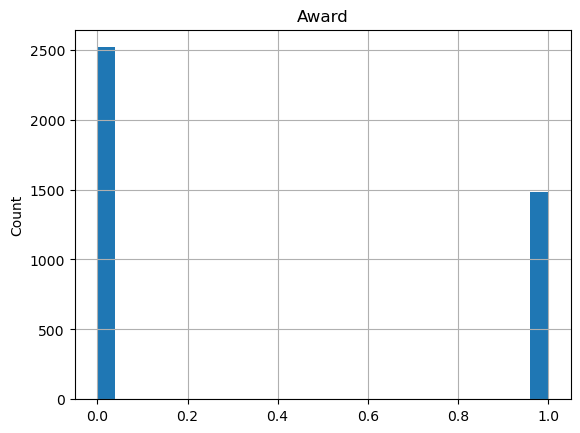

In [9]:
#Assuming you have imported the airline dataset into a pandas DataFrame called 'airline'
for feature in airline.columns:
    airline[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


In the above code, we have plotted the histogram of each column of the dataset 'airline'.
his code will iterate over each column in the 'airline' DataFrame. Separate histogram plots have been plotted for individual columns

#### Detection of Outliers

In [10]:
airline.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

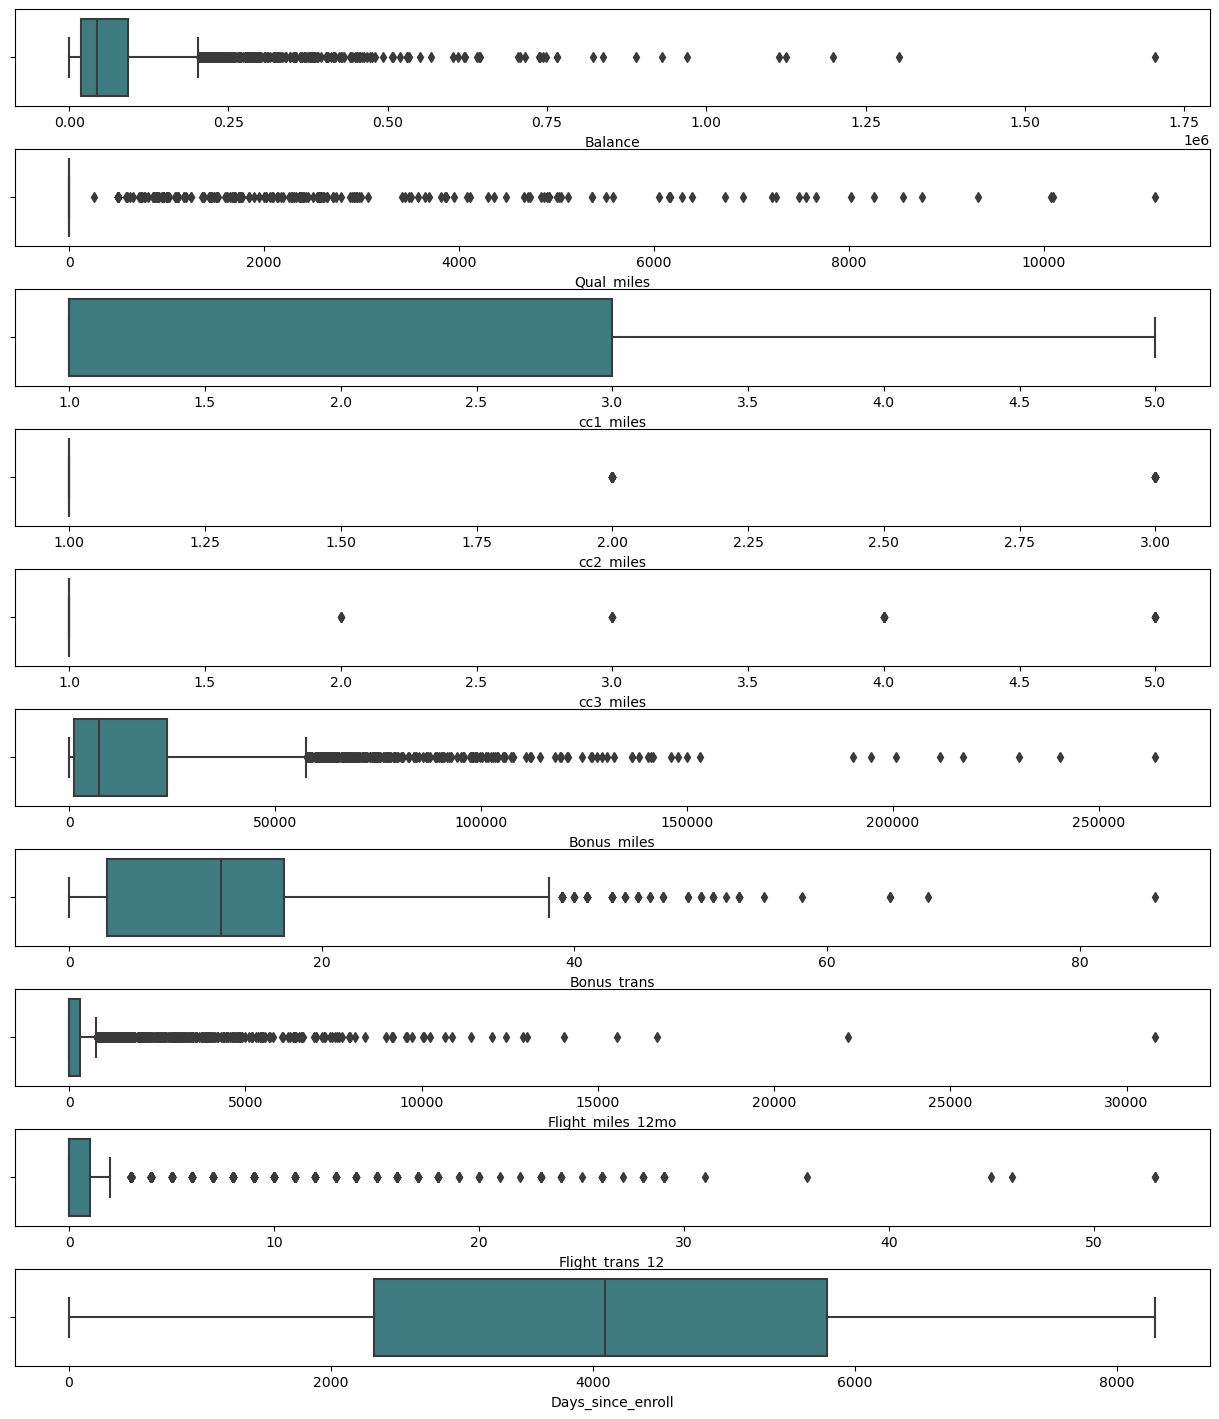

In [11]:
outlier = airline
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=.01)

In the above code, we have written a code to plot boxplots of each individual column of the dataset airline in order to determine the outliers in each column.

In [12]:
countNotermdeposit = len(airline[airline.Award == 0])
countHavetermdeposit = len(airline[airline.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airline.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airline.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


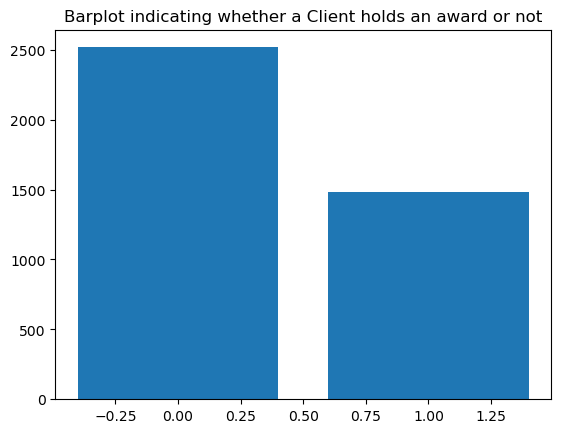

In [13]:
import matplotlib.pyplot as plt

order = airline['Award'].value_counts().index

plt.bar(order, airline['Award'].value_counts())
plt.xticks(fontsize=10)
plt.title('Barplot indicating whether a Client holds an award or not')
plt.show()

The above barplot indicates the number of clients having a award or not. The 0 indicates the client does have an award whereas the 1 indicated the client does not posses one.

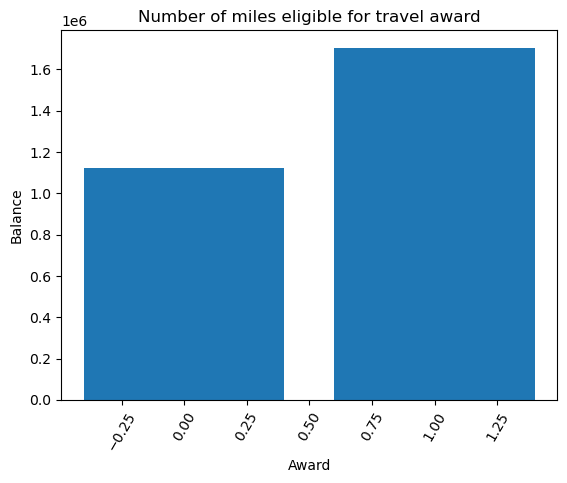

In [14]:
Balance = airline[['Award', 'Balance']].sort_values('Balance', ascending=False)
fig, ax = plt.subplots()
ax.bar(Balance['Award'], Balance['Balance'])
ax.set(xlabel='Award', ylabel='Balance')
plt.title('Number of miles eligible for travel award')
plt.xticks(rotation=60)
plt.show()

The above barplot showcases the balance i.e. the amount of miles required to travel held by the clients who hold an award and the clients who do not hold an award.

#### Correlation

In [15]:
correlation_matrix = airline.corr()
balance_correlation = correlation_matrix['Balance'].sort_values(ascending=False)
print(balance_correlation)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64


Breakdown of the above code:

correlation_matrix = airline.corr()

This line calculates the correlation matrix of the 'airline' DataFrame using the corr() method. The correlation matrix is a square matrix where each element represents the correlation coefficient between two columns in the DataFrame.

balance_correlation = correlation_matrix['Balance'].sort_values(ascending=False)

This line extracts the correlations of the 'Balance' column from the correlation matrix and stores it in the variable balance_correlation. The ['Balance'] selects the column of interest from the correlation matrix, and sort_values(ascending=False) sorts the correlations in descending order based on their values.

print(balance_correlation)

This line prints the correlations of the 'Balance' column in descending order. The result will show the correlation coefficients between the 'Balance' column and all other columns in the 'airline' DataFrame.

The resulting output will be the sorted correlation coefficients, indicating how strongly each column is correlated with the 'Balance' column. Higher positive values indicate a stronger positive correlation, while higher negative values indicate a stronger negative correlation. A correlation coefficient of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [1]:
#Plotting the Correlation heat map
correlation_matrix = airline.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=60)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation Heatmap')
plt.show()

NameError: name 'airline' is not defined

The above plot shows the correlation map between the individual columns of the dataset airline.

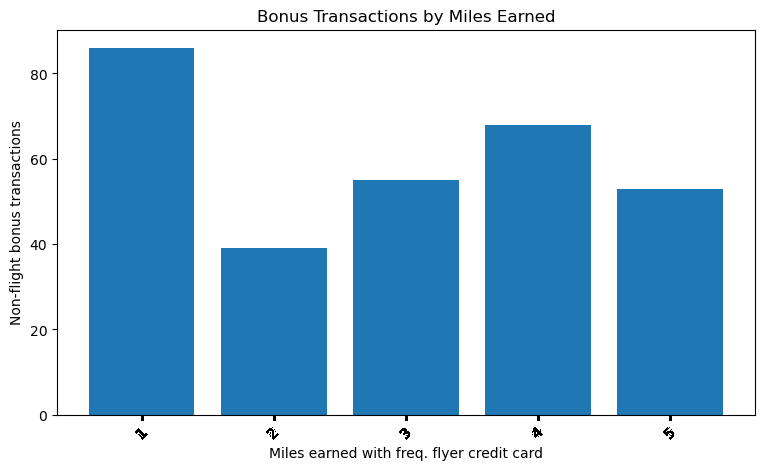

In [17]:
import matplotlib.pyplot as plt

sorted_data = airline[['cc1_miles', 'Bonus_trans']].sort_values('Bonus_trans', ascending=False)

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(sorted_data['cc1_miles'], sorted_data['Bonus_trans'])
ax.set_xlabel('Miles earned with freq. flyer credit card')
ax.set_ylabel('Non-flight bonus transactions')
ax.set_title('Bonus Transactions by Miles Earned')
ax.set_xticks(sorted_data['cc1_miles'])
ax.tick_params(axis='x', rotation=45)
plt.show()


## Data Pre-Processing

In [18]:
n = MinMaxScaler()
data= n.fit_transform(df.iloc[:,1:].to_numpy())
airline = pd.DataFrame(data, columns = df.columns[1:])
airline.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0
3,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.0,0.0,0.837955,0.0


In [19]:
data.shape

(3999, 11)

#  Hierarchy Clustering

First, we will create dendrogram in order to determine the number of clusters.

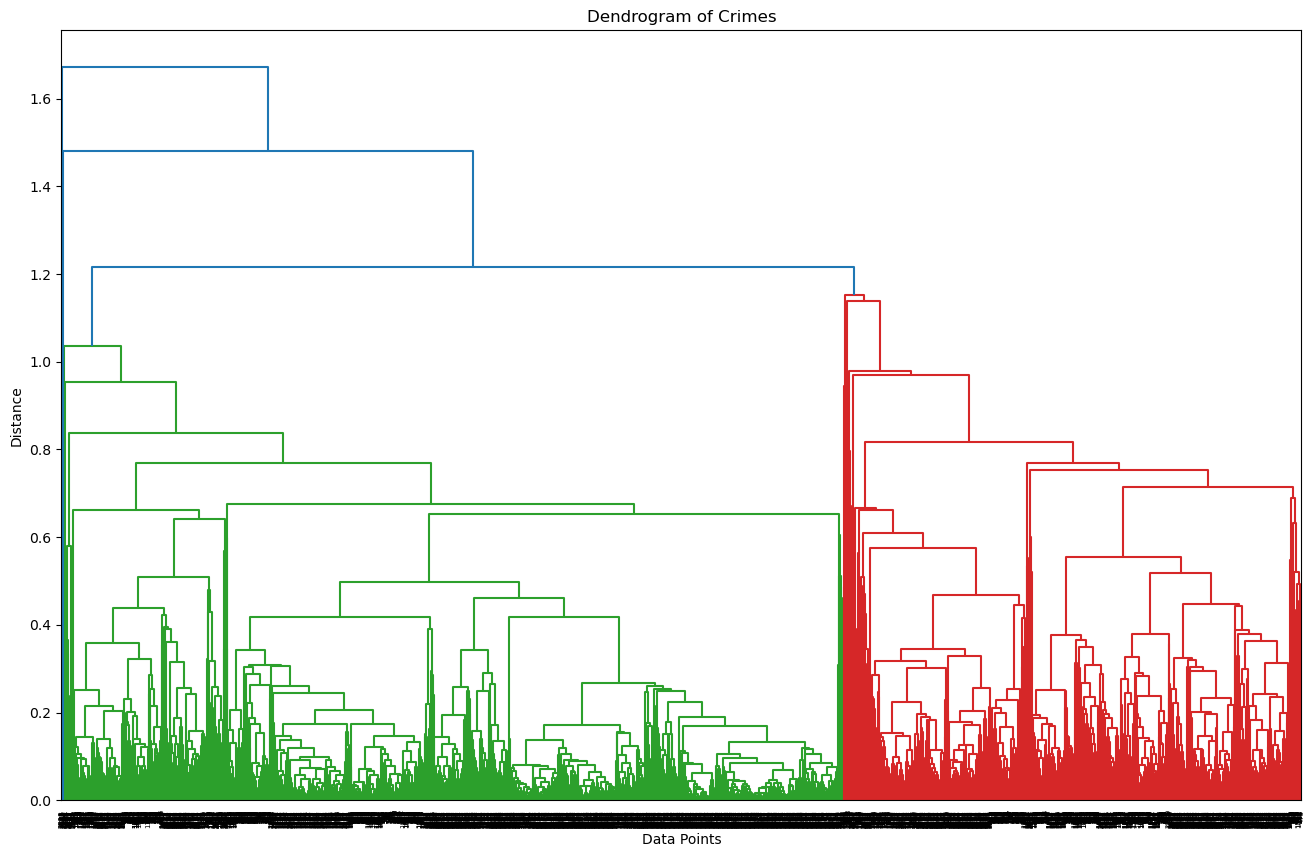

In [20]:
#Creating a dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16, 10))
dendrogram = sch.dendrogram(sch.linkage(airline, method='average'))

# Customization (optional)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram of Crimes')

plt.show()

Steps to create a dendrogram:

1.Import the necessary libraries import matplotlib.pyplot as plt import scipy.cluster.hierarchy as sch

2.Define the data you want to cluster. In the above case , the data we have taken is that of crimes.

3.Create the dendrogram using the dendrogram function from the sch module and assign it to a variable, such as dendrogram.

4.Customize the plot if desired, such as adjusting the figure size or adding labels to the axes.

In [21]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

#As the data is stored in the dataframe named crimes
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clusters = hc.fit_predict(airline)

/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The explaination of the above code is as follows: As we have used agglomerative clustering , the explaination of the above terms are as follows:

n_clusters=5: This specifies that you want to create 5 clusters.
affinity='euclidean': This indicates that you want to use the Euclidean distance as the distance metric for calculating the similarity between points.

linkage='average': This specifies that you want to use the average linkage method for merging clusters during the clustering process.

Agglomerative Clustering is a hierarchical clustering algorithm that starts with each sample as an individual cluster and then merges the closest pairs of clusters until the desired number of clusters is reached. The affinity metric determines the distance between samples, and the linkage method determines how to measure the distance between clusters.

After fitting the clustering model, the fit_predict method assigns cluster labels to each data point in the input dataset airline, and the resulting labels are stored in the clusters variable.

In [22]:
#Create a DataFrame with the cluster labels
cc = pd.DataFrame(clusters, columns=['Clusters'])
cc.head(6)

,Clusters
0,1
1,1
2,1
3,1
4,0
5,1


In the above code, the cluster labels are assigned to the DataFrame cc, where each row corresponds to a data point and the column 'Clusters' contains the cluster label for that data point.

In [23]:
airline_new=pd.concat([airline,cc],axis=1)
airline_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0


To concatenate two DataFrames, "airline" and "cc," along the columns axis (axis=1). The resulting DataFrame is stored in the variable "airline_new." Finally, the first few rows of the resulting DataFrame are displayed using the "head()" method.

In [24]:
airline_new.sort_values("Clusters").reset_index()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1,1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
2,1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3,3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
4,1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
3995,1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
3996,2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
3997,1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


The above code is sorting the DataFrame "airline_new" by the column "Clusters" and then resetting the index. The resulting DataFrame will have a new index that starts from 0 and is incremented by 1 for each row.

By resetting the index, the previous index values will be moved to a new column called "index." This is helpful if you want to retain the original index values as a separate column in the DataFrame.

In [25]:
airline_new['Clusters'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: Clusters, dtype: int64

To get the value counts of each unique value in the "Clusters" column of the "airline_new" DataFrame. The value_counts() gives us the number of unique values.

# K means Clustering

In K means Clustering, we have to set a number of predefined clusters unlike in hierrachial clustering. We will use the elbow method for determining the number of clusters.

We will have to pre process the data.
First we will have to standardize the data and then normalize the data.

In [26]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airline)
print(std_airline.shape)


(3999, 11)


airline is a Pandas DataFrame, the fit_transform method is used to compute the mean and standard deviation of the data and then standardize it.

The fit_transform method returns the standardized version of the airline data. The standardized data will have zero mean and unit variance. The shape attribute of the standardized data gives the dimensions of the array, indicating the number of rows and columns.

In [27]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler

#`airline` is your dataset

minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline)
norm_airline.shape


(3999, 11)

airline is a Pandas DataFrame, the fit_transform method of the MinMaxScaler scales and transforms the data to a specified range (usually between 0 and 1) based on the minimum and maximum values in the dataset.

The norm_airline variable will contain the normalized data after applying the fit_transform method. The shape of norm_airline will be the same as the original airline data.

One can use norm_airline.shape to get the shape of the array (number of rows, number of columns)

In [28]:
#Elbow Method determining the number of clusters
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.271222
3,4,28588.528926
4,5,23700.531350
5,6,21473.102783
6,7,18891.926703
7,8,17316.685224
8,9,16049.684339
9,10,14726.983323


Meaning of the Code

The code you provided is using the Elbow Method to determine the optimal number of clusters for a dataset. Here's a breakdown of the code:

cluster_range = range(1,15): This line defines the range of cluster numbers you want to consider, from 1 to 14.


cluster_errors = []: This line initializes an empty list to store the cluster errors for each number of clusters.


The following block of code is a loop that iterates over each number of clusters in the cluster_range:
clusters = KMeans(num_clusters,n_init=10): This line creates a KMeans object with the current number of clusters (num_clusters) and sets the number of times the algorithm will be run with different initial centroids (n_init=10).

clusters.fit(std_airline): This line fits the KMeans model to the std_airline dataset, assuming std_airline is the standardized dataset you are working with.


labels = clusters.labels_: This line assigns cluster labels to each data point in the dataset based on the clustering result.


centroids = clusters.cluster_centers_: This line retrieves the coordinates of the centroids for each cluster.


cluster_errors.append(clusters.inertia_): This line appends the inertia (within-cluster sum of squares) of the current clustering result to the cluster_errors list. Inertia is a measure of how internally coherent the clusters are.


clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors}): This line creates a pandas DataFrame to store the number of clusters and their corresponding cluster errors.


The resulting clusters_df DataFrame will have two columns: "Num_Clusters" and "Cluster_Errors", where "Num_Clusters" contains the range of cluster numbers you specified, and "Cluster_Errors" contains the corresponding inertia values for each number of clusters.

This code can be used to plot the elbow curve and visually determine the number of clusters that provides the best trade-off between compactness (low inertia) and distinctness (sufficiently high number of clusters). The optimal number of clusters is typically identified at the "elbow" of the curve, where the improvement in cluster errors starts to diminish significantly.


Within-Cluster Sum-of-Squares Criterion

Use Elbow Graph to find optimum number of clusters (K value) from K values range

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-package

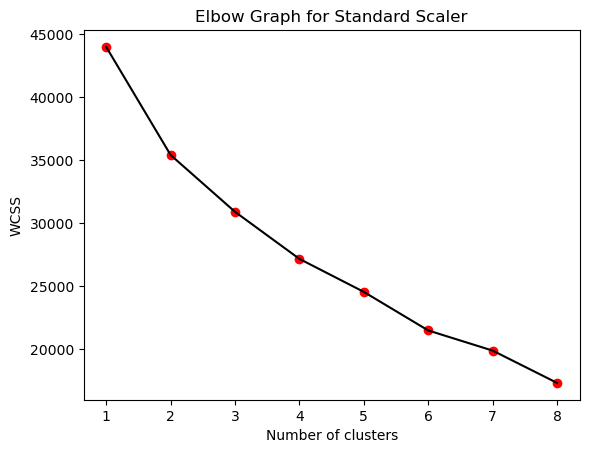

In [29]:
#Within Cluster Sum of Squares Criterion
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airline)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The code you provided is used to plot an elbow graph to determine the optimal number of clusters for a dataset. It calculates the Within Cluster Sum of Squares (WCSS) criterion for different values of K (number of clusters) and plots the results.

Here's a breakdown of the code:

wcss = []: Initializes an empty list to store the WCSS values for each number of clusters.
for i in range(1, 9): Iterates through the range of numbers from 1 to 8 (inclusive) to evaluate different values of K.


kmeans = KMeans(n_clusters=i, random_state=2): Creates a KMeans object with the current number of clusters (i) and a random state of 2.


kmeans.fit(std_airline): Fits the KMeans model to the standardized airline dataset (std_airline).


wcss.append(kmeans.inertia_): Appends the WCSS value of the fitted KMeans model to the wcss list.


The following lines of code plot the elbow graph using Matplotlib. plt.plot(range(1, 9), wcss, color='black') plots a line graph of the WCSS values for each number of clusters. 


plt.scatter(range(1, 9), wcss, color='red') adds red markers at each data point. 

The rest of the code sets labels and titles for the graph.


plt.show(): Displays the graph.


The elbow graph helps in identifying the optimal number of clusters by observing the point where the rate of decrease in WCSS begins to level off. This point is often referred to as the "elbow" of the graph. The number of clusters corresponding to the elbow point is typically considered as the optimal value.



Observation :
As, we can see there is no clear elbow visible. We can approximately say that if we choose 2 clusters that would seem to be an appropriate estimation.

But for a clear picture, we would take the Silhouette Score.



In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

In [38]:
#Silhouette Score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anaconda3/lib/python3.10/site-package

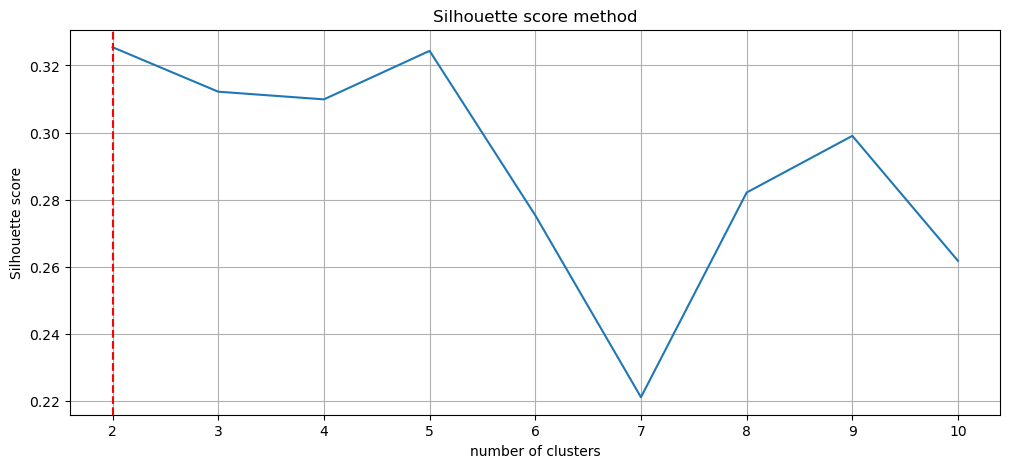

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Here's a breakdown of the code:

python
Copy code
fig, ax = plt.subplots(figsize=(12,5))
This line creates a new figure and axes object for the plot, with a specified size of 12 inches wide and 5 inches tall.

python
Copy code
ax = sns.lineplot(x=n_clusters, y=s_scores)
This line uses the seaborn lineplot() function to create a line plot. The x=n_clusters and y=s_scores arguments specify the data for the x-axis (number of clusters) and y-axis (silhouette scores) respectively.

python
Copy code
ax.set_title("Silhouette score method")
This line sets the title of the plot to "Silhouette score method".

python
Copy code
ax.set_xlabel("number of clusters")
This line sets the label for the x-axis to "number of clusters".

python
Copy code
ax.set_ylabel("Silhouette score")
This line sets the label for the y-axis to "Silhouette score".

python
Copy code
ax.axvline(2, ls="--", c="red")
This line adds a vertical dashed line at x = 2 on the plot. The ls="--" parameter sets the line style to dashed, and the c="red" parameter sets the line color to red.

python
Copy code
plt.grid()
This line adds gridlines to the plot.

python
Copy code
plt.show()
This line displays the plot.

Overall, the code should generate a line plot with the number of clusters on the x-axis, silhouette scores on the y-axis, a vertical dashed line at x = 2, and appropriate labels and title.

In [ ]:
#Training the K means algorithm on the training dataset
from sklearn.cluster import KMeans

# Assuming std_airline is your training dataset

# Training the K-means algorithm on the training dataset
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)

# Shape of y_predict_kmeans
print(y_predict_kmeans.shape)

The shape of the predicted labels (y_predict_kmeans) will depend on the shape of the input data std_airline and the number of clusters specified (n_clusters=2). std_airline pandas DataFrame with n samples, the shape of y_predict_kmeans will be (n,), indicating a 1-dimensional array with n elements.

In [ ]:
#Predictions made by K means algorithm
y_predict_kmeans

In [ ]:
#Printing the labels
model_kmeans.labels_

In [ ]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster (closer together all the points are)



model_kmeans and trying to access its cluster_centers_ attribute.

In general, cluster_centers_ is an attribute commonly associated with clustering algorithms such as K-means. It represents the coordinates or centroids of the clusters identified by the algorithm. Each row in the cluster_centers_ array corresponds to a cluster, and the columns represent the dimensions of the data.

In [ ]:
model_kmeans.inertia_

In [ ]:
#Creating a data frame
columns=['Cluster Group']
y_prediction=pd.DataFrame(y_predict_kmeans,columns=columns)
y_prediction

As, we can see from the above each entry belongs to a particular cluster number. For example, Customer id 1 belongs to Cluster 1.

In [ ]:
#Assigning clusters to the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_